In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,RidgeCV,ElasticNet,ElasticNetCV,LinearRegression,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("E:/2.ML-DATASETS/weatherAUS.csv")

In [3]:
dataset.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<AxesSubplot:>

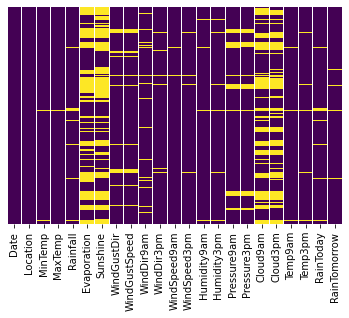

In [4]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
"""to fill missing values  but this will rename the column name"""
imputer = SimpleImputer(missing_values = np.nan,strategy = "most_frequent")
imp_dataset = imputer.fit_transform(dataset)
"""imputer will convert the datafreme to np array and column header will be renamed to numbers so we are getting back original headers"""
df = pd.DataFrame(imp_dataset,columns = dataset.columns)
imp_dataset

array([['2008-12-01', 'Albury', 13.4, ..., 21.8, 'No', 'No'],
       ['2008-12-02', 'Albury', 7.4, ..., 24.3, 'No', 'No'],
       ['2008-12-03', 'Albury', 12.9, ..., 23.2, 'No', 'No'],
       ...,
       ['2017-06-23', 'Uluru', 5.4, ..., 26.1, 'No', 'No'],
       ['2017-06-24', 'Uluru', 7.8, ..., 26.0, 'No', 'No'],
       ['2017-06-25', 'Uluru', 14.9, ..., 20.9, 'No', 'No']], dtype=object)

In [91]:
x = df.drop(columns=["Date","Evaporation","Sunshine","RainTomorrow"])
y = df["RainToday"]
y = pd.DataFrame(y)

<AxesSubplot:>

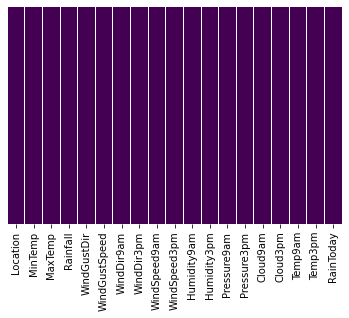

In [92]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
x

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No


<AxesSubplot:xlabel='RainToday', ylabel='count'>

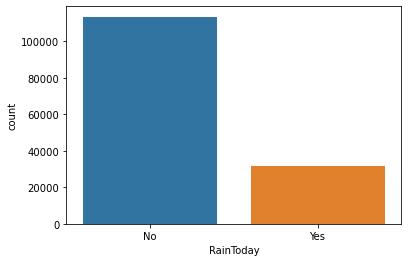

In [94]:
sns.countplot(x='RainToday',hue=None,data=x)

In [106]:
'''label encoding'''
x_category = ["Location","WindGustDir","WindDir9am","WindDir3pm","WindDir3pm","RainToday"]
'''using for loop'''
# le = LabelEncoder()
# for item in category:
#     x[item] = le.fit_transform(x[item])

'''using apply()'''
x[x_category] = x[x_category].apply(le.fit_transform)
y["RainToday"] = le.fit_transform(y["RainToday"])

In [145]:
x

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0
145458,41,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0


In [111]:
scaler = StandardScaler()
scaled_arr = scaler.fit_transform(x)

In [113]:
scaled_arr

array([[-1.53166617,  0.19132753, -0.04135977, ..., -0.01407077,
         0.02310362, -0.52979545],
       [-1.53166617, -0.75105231,  0.26874452, ...,  0.03244663,
         0.387799  , -0.52979545],
       [-1.53166617,  0.11279588,  0.35331842, ...,  0.62166712,
         0.22733303, -0.52979545],
       ...,
       [ 1.20928479, -1.06517892,  0.52246622, ..., -0.69632607,
         0.65037966, -0.52979545],
       [ 1.20928479, -0.68822699,  0.53656187, ..., -0.29317521,
         0.63579185, -0.52979545],
       [ 1.20928479,  0.42692249, -0.45013361, ..., -0.30868102,
        -0.10818671, -0.52979545]])

In [129]:
vif_df = pd.DataFrame()

In [130]:
vif_df["vif"]=[variance_inflation_factor(scaled_arr,i) for i in range(scaled_arr.shape[1])]
vif_df["feature"] = x.columns

In [131]:
vif_df

,vif,feature
0,1.017475,Location
1,7.917151,MinTemp
2,20.875204,MaxTemp
3,1.375881,Rainfall
4,1.613960,WindGustDir
5,2.453261,WindGustSpeed
6,1.274489,WindDir9am
7,1.606226,WindDir3pm
8,1.834027,WindSpeed9am
9,1.944790,WindSpeed3pm


<AxesSubplot:>

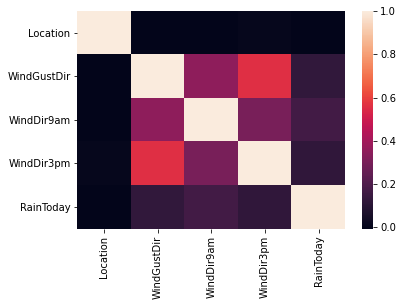

In [134]:
sns.heatmap(x.corr())

In [138]:
x.corr(method ='pearson')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
Location,1.000000,-0.003732,-0.002439,0.008769,-0.005484
WindGustDir,-0.003732,1.000000,0.353790,0.563161,0.124675
WindDir9am,-0.002439,0.353790,1.000000,0.301249,0.167718
WindDir3pm,0.008769,0.563161,0.301249,1.000000,0.121719
RainToday,-0.005484,0.124675,0.167718,0.121719,1.000000


In [152]:
x_train,x_test,y_train,y_test  = train_test_split(scaled_arr,y,test_size = 0.25,random_state = 100)

In [153]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [154]:
test = scaler.fit_transform([[2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0]])

In [155]:
lr.predict(test)

array([[0.21916678]])

In [156]:
lr.score(x_test,y_test)

1.0

In [157]:
lr.coef_

array([[ 4.08345459e-16,  2.62775960e-16, -4.89912363e-16,
        -1.05246453e-15, -1.41319361e-16, -1.34044011e-16,
        -7.46035771e-17, -4.54056813e-17, -1.39313091e-16,
        -3.47839218e-17, -1.92050920e-16, -1.77317904e-16,
         2.63266511e-16, -4.19077472e-16,  1.63410270e-16,
         1.98785321e-18, -7.60085573e-17, -1.42314138e-17,
         4.13681887e-01]])

In [158]:
lr.intercept_

array([0.21916678])

In [159]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[1]
    p = x.shape[0]
    adjusted_r2 = 1-(1-r2)*(n-1)/(p-1)
    return adjusted_r2

In [160]:
adj_r2(x_test,y_test)

1.0